In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [9]:
#employee sarlary prediction using adultcsv
#import your library
import pandas as pd

In [10]:
data = pd.read_csv(r"E:\projects\IBM_intern\adult 3.csv")

In [11]:
data.shape

(48842, 15)

In [12]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
data.workclass.replace({'?':'notlisted'},inplace=True)

In [14]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [15]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

In [16]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [17]:
data = data[data['workclass'] != 'notlisted']

In [18]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [19]:
data = data[data['marital-status'] != 'Married-AF-spouse']

In [20]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       21438
Never-married            14869
Divorced                  6363
Separated                 1433
Widowed                   1295
Married-spouse-absent      582
Name: count, dtype: int64


In [21]:
data.occupation.replace({'?':'others'},inplace=True)

In [22]:
data = data[data['occupation'] != 'others']

In [23]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6168
Craft-repair         6107
Exec-managerial      6082
Adm-clerical         5602
Sales                5498
Other-service        4916
Machine-op-inspct    3019
Transport-moving     2353
Handlers-cleaners    2069
Farming-fishing      1481
Tech-support         1446
Protective-serv       982
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [24]:
print(data['relationship'].value_counts())

relationship
Husband           18986
Not-in-family     11916
Own-child          6697
Unmarried          4865
Wife               2117
Other-relative     1399
Name: count, dtype: int64


In [25]:
print(data['native-country'].value_counts())

native-country
United-States                 41241
Mexico                          903
?                               811
Philippines                     281
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru         

In [26]:
data = data[data['native-country'] != '?']

In [27]:
print(data['native-country'].value_counts())

native-country
United-States                 41241
Mexico                          903
Philippines                     281
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [28]:
#outliers
import matplotlib.pyplot as plt

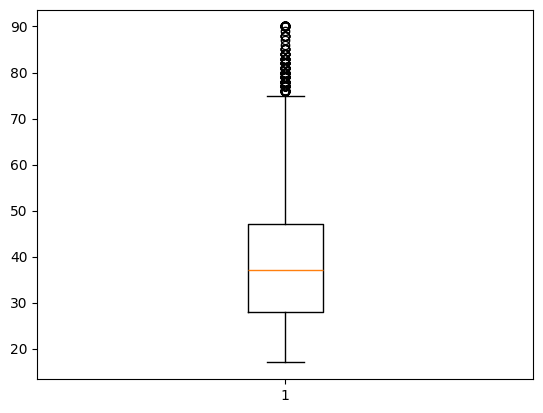

In [29]:
plt.boxplot(data['age'])
data = data[(data['age'] <= 75) & (data['age'] >= 17)]
plt.show()

In [30]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [31]:
data.drop(columns=['capital-loss'], inplace=True)
data.drop(columns=['education'], inplace=True)

In [32]:
data.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,30,United-States,<=50K


In [33]:
df_cleaned_5=data.copy()

In [34]:
#Step 1: Find unique values in the income column
print("Unique values in income before cleaning:")
unique_values = df_cleaned_5['income'].unique()
print(unique_values)

# Step 2: Clean the income column (strip whitespace, convert to lowercase)
df_cleaned_5['income'] = df_cleaned_5['income'].str.strip().str.lower()

# Step 3: Find unique values after cleaning
print("\nUnique values in income after cleaning:")
unique_values_cleaned = df_cleaned_5['income'].unique()
print(unique_values_cleaned)

# Step 4: Check for unexpected values or NaN
if df_cleaned_5['income'].isna().sum() > 0:
    print(f"\nWarning: {df_cleaned_5['income'].isna().sum()} NaN values found in income.")
    # Option: Drop NaN rows
    df_cleaned_5 = df_cleaned_5.dropna(subset=['income']).reset_index(drop=True)
    # Alternative: Fill NaN with majority class (commented out)
    # df_cleaned_5['income'] = df_cleaned_5['income'].fillna('<=50k')

# Step 5: Identify the two main unique values
unique_values_cleaned = df_cleaned_5['income'].unique()
if len(unique_values_cleaned) != 2:
    raise ValueError(f"Expected exactly 2 unique values in income, found {len(unique_values_cleaned)}: {unique_values_cleaned}")

# Step 6: Map the two unique values to 0 and 1
# Assume the first value (likely <=50k) maps to 0, second (likely >50k) to 1
income_map = {unique_values_cleaned[0]: 0, unique_values_cleaned[1]: 1}
# If you want to ensure specific mapping (e.g., <=50k to 0, >50k to 1), adjust here
# Example: income_map = {'<=50k': 0, '>50k': 1} if values are known
df_cleaned_5['income'] = df_cleaned_5['income'].map(income_map)

# Step 7: Verify mapping
print("\nIncome value counts after mapping:")
print(df_cleaned_5['income'].value_counts(dropna=False))

# Check for NaN after mapping
if df_cleaned_5['income'].isna().sum() > 0:
    print(f"\nError: {df_cleaned_5['income'].isna().sum()} NaN values remain after mapping.")
else:
    print("\nMapping successful, no NaN values in income.")

Unique values in income before cleaning:
['<=50K' '>50K']

Unique values in income after cleaning:
['<=50k' '>50k']

Income value counts after mapping:
income
0    33756
1    11144
Name: count, dtype: int64

Mapping successful, no NaN values in income.


In [35]:
df_cleaned_5.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,30,United-States,0


In [36]:
! pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
df= df_cleaned_5.copy()

In [38]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,40,United-States
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,50,United-States
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,40,United-States
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,United-States


In [39]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [40]:
# Encode categorical features using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [41]:
X.drop(columns=['capital-gain'], inplace=True)
X.drop(columns=['fnlwgt'],inplace=True)

In [42]:
X.head(5)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,2,7,3,6,3,2,1,40,38
1,38,2,9,1,4,0,4,1,50,38
2,28,1,12,1,10,0,4,1,40,38
3,44,2,10,1,6,0,2,1,40,38
5,34,2,6,3,7,1,4,1,30,38


In [43]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))#
#print(classification_report(y_test, y_pred_tuned))

Logistic Regression Accuracy: 0.8007795100222718


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_lambda': [1, 1.5, 2.0]
}

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=30,               # Try 30 random combinations
    scoring='accuracy',
    n_jobs=-1,               # Use all CPU cores
    cv=3,
    verbose=1,
    random_state=42
)

# Fit
random_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Hyperparameters:", random_search.best_params_)

# After finding best estimator
best_xgb = random_search.best_estimator_

# Predict on test data
y_pred_tuned = best_xgb.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score, classification_report

print("📊 Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_tuned))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
📊 Tuned XGBoost Accuracy: 0.842316258351893


In [46]:
import pickle

# Save best_xgb model as pickle
with open("xgb_tuned_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

print("✅ Model saved as xgb_tuned_model.pkl")

✅ Model saved as xgb_tuned_model.pkl


In [47]:
import pickle
import numpy as np

# Load the saved model
with open("xgb_tuned_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

# Define prediction function
def predict_income(age, workclass, educational_num, marital_status,
                   occupation, relationship, race, gender,
                   hours_per_week, native_country):
    """
    Takes input features and returns the prediction.
    Adjust encoding or feature ordering as per your training data pipeline.
    """

    # Example input array – adjust ordering to match X_train columns
    input_features = np.array([[age, workclass, educational_num, marital_status,
                                occupation, relationship, race, gender,
                                hours_per_week, native_country]])

    # Predict
    prediction = loaded_xgb_model.predict(input_features)

    return prediction[0]

In [48]:
# Example usage
result = predict_income(37, 1, 9, 2, 3, 1, 4, 1, 40, 39)  # Replace with realistic encoded inputs
print("📝 Predicted class:", result)

📝 Predicted class: 0


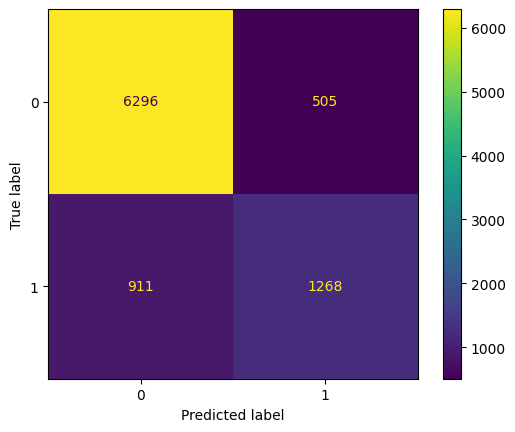

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(loaded_xgb_model, X_test, y_test)

In [50]:
from sklearn.metrics import precision_recall_curve, f1_score

In [56]:

y_probs = loaded_xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for max F1: {best_threshold}")

y_pred_optimal = (y_probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_optimal))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Best threshold for max F1: 0.34036266803741455
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6801
           1       0.60      0.77      0.68      2179

    accuracy                           0.82      8980
   macro avg       0.76      0.80      0.78      8980
weighted avg       0.84      0.82      0.83      8980

ROC AUC: 0.8926865289024595


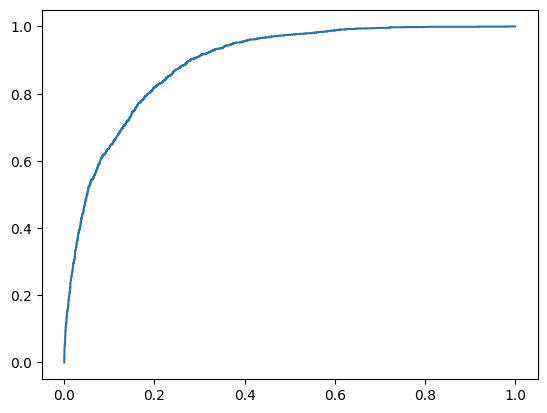

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)

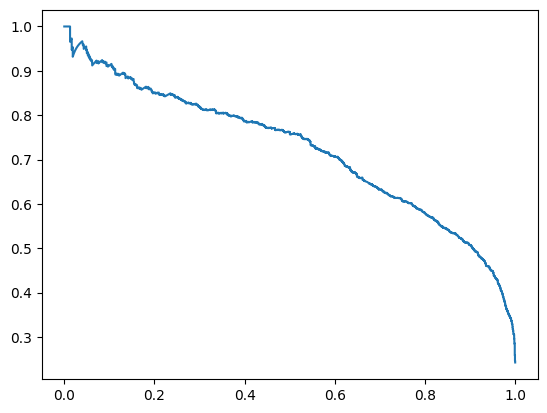

In [53]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

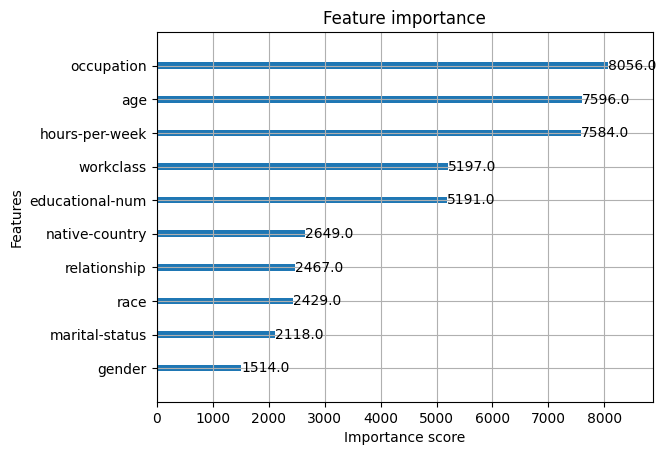

In [54]:
from xgboost import plot_importance
plot_importance(loaded_xgb_model)